[*********************100%%**********************]  3 of 3 completed


Ticker          AAPL     GOOGL      MSFT
Date                                    
2015-01-05 -0.028171 -0.019054 -0.009196
2015-01-06  0.000094 -0.024679 -0.014677
2015-01-07  0.014022 -0.002941  0.012705
2015-01-08  0.038422  0.003484  0.029418
2015-01-09  0.001072 -0.012211 -0.008405
VaR at 95.0% confidence: -0.03
VaR at 99.0% confidence: -0.04


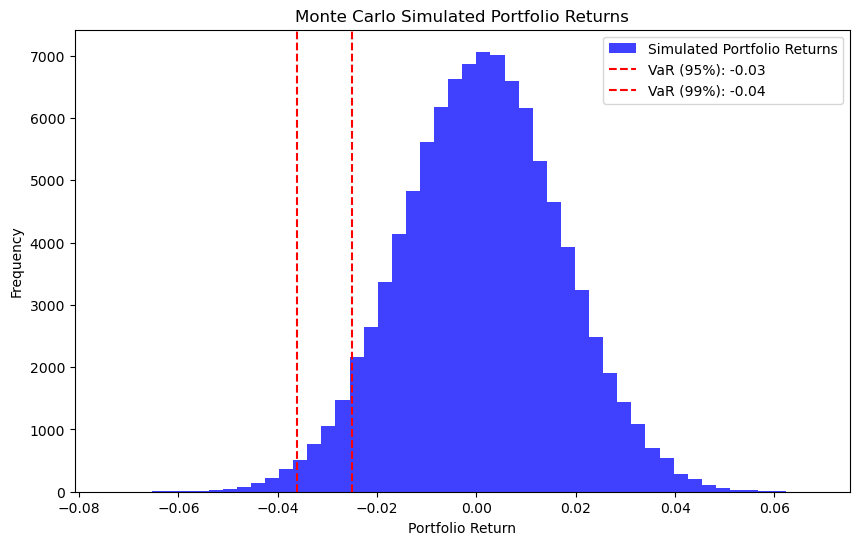

Expected Shortfall (95% confidence): -0.03


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Fetch Historical Data
tickers = ['AAPL', 'MSFT', 'GOOGL']  # Portfolio tickers
weights = np.array([0.4, 0.4, 0.2])  # Portfolio weights
start_date = "2015-01-01"
end_date = "2023-12-31"

# Download adjusted close prices
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
returns = data.pct_change().dropna()  # Daily returns

# Check data
print(returns.head())

# Step 2: Portfolio Simulation
# Number of simulations
num_simulations = 100000
time_horizon = 1  # 1 day

# Portfolio mean and covariance
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Simulate portfolio returns
portfolio_returns = []
for _ in range(num_simulations):
    simulated_returns = np.random.multivariate_normal(mean_returns, cov_matrix, time_horizon)
    portfolio_return = np.dot(weights, simulated_returns.T)
    portfolio_returns.append(portfolio_return.sum())

portfolio_returns = np.array(portfolio_returns)

# Step 3: VaR Calculation
confidence_levels = [0.95, 0.99]  # Confidence levels
VaRs = {}

for cl in confidence_levels:
    VaR = np.percentile(portfolio_returns, (1 - cl) * 100)
    VaRs[cl] = VaR
    print(f"VaR at {cl*100}% confidence: {VaR:.2f}")

# Step 4: Visualization
plt.figure(figsize=(10, 6))
plt.hist(portfolio_returns, bins=50, alpha=0.75, color="blue", label="Simulated Portfolio Returns")
for cl, VaR in VaRs.items():
    plt.axvline(VaR, color="red", linestyle="--", label=f"VaR ({cl*100:.0f}%): {VaR:.2f}")
plt.title("Monte Carlo Simulated Portfolio Returns")
plt.xlabel("Portfolio Return")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Step 5: Report Key Metrics
expected_shortfall_95 = portfolio_returns[portfolio_returns < VaRs[0.95]].mean()
print(f"Expected Shortfall (95% confidence): {expected_shortfall_95:.2f}")
